# Part A: Regression on California Test Scores

## 1. **Find the Dataset:**
   - Access the California Test Score Data Set from the following [website](https://vincentarelbundock.github.io/Rdatasets/datasets.html).
   - Read through the "DOC" file to understand the variables in the dataset.
   - Use the following [url](https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv) to import the data. The target data (i.e., the dependent variable) is named "testscr". You can use all variables in the data except for "readscr" and "mathscr" in the following analysis (those two variables were used to generate the dependent variable).


In [1]:
# Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv file
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv')

# Quick check of the data set
df.head()

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


## 2. **Visualize Univariate Distribution:**
   - Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

In [3]:
# Chosen Variables
target_variable = 'testscr'
explanatory_variables = ['calwpct', 'expnstu', 'elpct']

# Add descriptive titles for the explanatory variables
titles = {
    'calwpct': 'Percent qualifying for CalWorks (income assistance) (%)',
    'expnstu': 'Expenditure per student ($)',
    'elpct': 'Percent of English learners (%)'
}

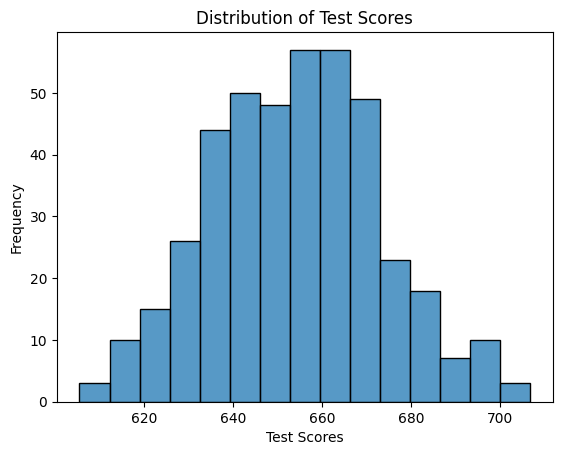

In [4]:
# Use histogram to visualize an univariate distribution
# Visualize the univariate distribution of the target feature
sns.histplot(df[target_variable]) 
plt.title('Distribution of Test Scores')
plt.xlabel('Test Scores')
plt.ylabel('Frequency')
plt.show()

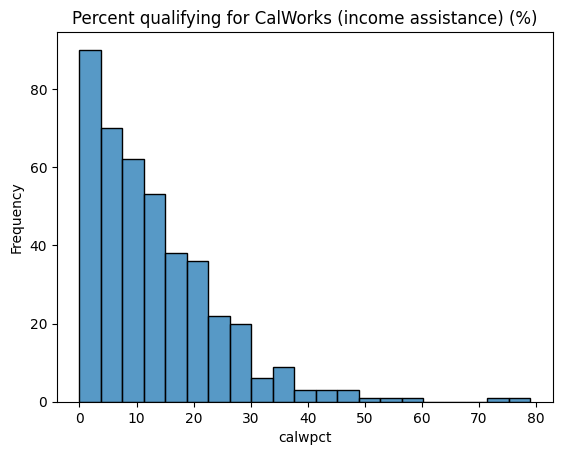

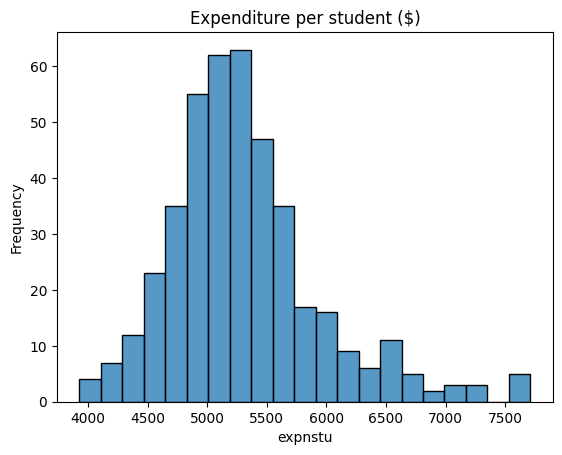

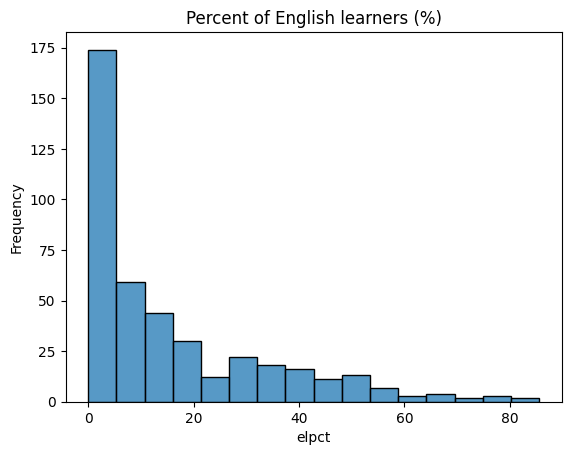

In [5]:
# Visualize the univariate distribution of explanatory variables
for var in explanatory_variables:
    sns.histplot(df[var])
    plt.title(titles[var])  # get the descriptive title from the dictionary
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

## 3. **Visualize Dependency:**
   - Visualize the dependency of the target on each feature you just plotted.

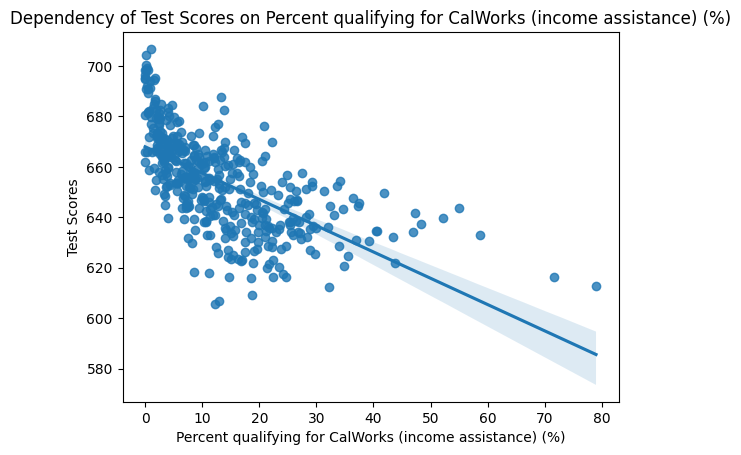

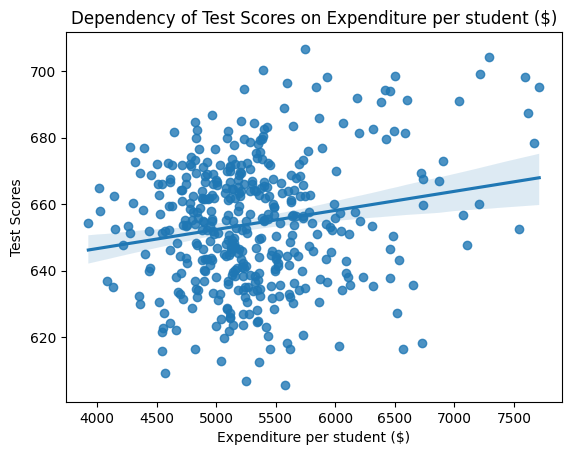

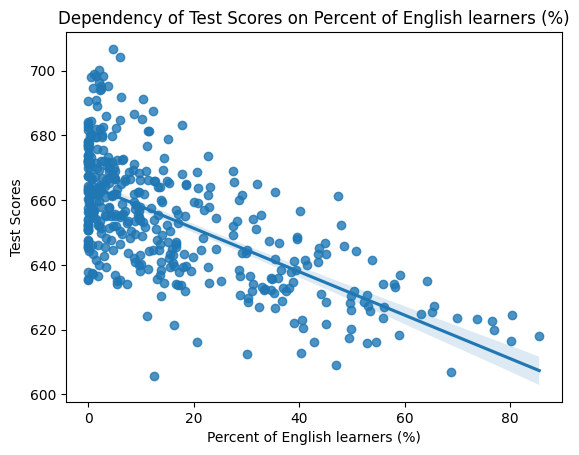

In [6]:
# Use scatter plot with a regression line to visualize dependency of the target on each chosen variable,  
# Visualizing the dependency of the target on each explanatory variable
for var in explanatory_variables:
    sns.regplot(x=df[var], y=df[target_variable])
    plt.title(f'Dependency of Test Scores on {titles[var]}')
    plt.xlabel(titles[var])
    plt.ylabel('Test Scores')
    plt.show()

## 4. **Split Data and Build Models:**
   - Split the data into training and test sets.
   - Build models that evaluate the relationship between all available quantitative X variables in the California test dataset and the target variable.
   - Evaluate KNN (for regression), Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. How different are the results?

In [7]:
# Import Python liabrary
from sklearn.model_selection import train_test_split, cross_val_score

In [17]:
# Split the data into training and test sets
X = df.copy().drop(columns=['testscr', 'county', 'district', 'grspan','rownames', 'distcod','readscr','mathscr'])  # Exclude target and categorical columns
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 25% of data as testing data; random_state = 42 to ensures that the split is reproducible

X.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


KNN Model (for regression)

In [18]:
#Train model with K=10
from sklearn.neighbors import KNeighborsClassifier ## Since our target variable is NOT categorical, we use the below KNeighborsRegressor instead
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor with K=10
knn = KNeighborsRegressor(n_neighbors=10)

# Train the model using the training data
knn.fit(X_train, y_train)

# Print the accuracy socre
# Note: this score is same as 'R^2 Score' since we are using KNeighborsRegressor instead of KNeighborsClassifier
# Note: accuracy score is not directly applicable here since accuracy is a classification metric, while R² is a regression metric

# Find mean of the cross-validation with 10 folds
cv_scores_knn = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='r2'))

# Print the R² score on the training set
print(f"KNN (for regression) - R² score on train set: {knn.score(X_train, y_train)}")
# Print the R² score on the test set
print(f"KNN (for regression) - R² score on test set: {knn.score(X_test, y_test)}")
# Print the mean R² score from cross-validation
print(f"KNN (for regression) - Mean R² score from cross-validation: {cv_scores_knn}")

KNN (for regression) - R² score on train set: 0.18266259338031166
KNN (for regression) - R² score on test set: 0.028644813246124334
KNN (for regression) - Mean R² score from cross-validation: 0.009990360642611973


Linear Regression (OLS)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model using the training data
lin_reg.fit(X_train, y_train)


# Make predictions on the test data
y_pred_OLS = lin_reg.predict(X_test)

# Print the R² score based on prediction
print(f"Linear Regression - R² Score based on prediction: {r2_score(y_test, y_pred_OLS)}")


# Find mean of the cross-validation with 10 folds
cv_scores_OLS = np.mean(cross_val_score(lin_reg, X_train, y_train, cv=10, scoring='r2'))
print(f"Linear Regression - Mean R² score from cross-validation: {cv_scores_OLS}")

Linear Regression - R² Score based on prediction: 0.8070239455626858
Linear Regression - Mean R² score from cross-validation: 0.7793254938876506


Ridge Regression

In [20]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # default alpha

# Train the model using the training data
ridge_reg.fit(X_train, y_train)


# Make predictions on the test data 
y_pred_ridge = ridge_reg.predict(X_test)

# Print the R² score based on prediction
print(f'Ridge Regression - R² Score based prediction: {r2_score(y_test, y_pred_ridge)}')


# Find mean of the cross-validation with 10 folds
cv_scores_ridge = np.mean(cross_val_score(ridge_reg, X_train, y_train, cv=10, scoring='r2'))
print(f"Ridge Regression - Mean R² score from cross-validation: {cv_scores_ridge}")

Ridge Regression - R² Score based prediction: 0.8074600282558806
Ridge Regression - Mean R² score from cross-validation: 0.780464223210051


Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

# Initialize the Lasso regression model
lasso_reg = Lasso(alpha=1.0, max_iter=10000)  

# Train the model using the training data
lasso_reg.fit(X_train, y_train)


# Make predictions on the test data
y_pred_lasso = lasso_reg.predict(X_test)

# Print the R² score based on prediction
print(f'Lasso Regression - R² Score based on prediction: {r2_score(y_test, y_pred_lasso)}')


# Find mean of the cross-validation with 10 folds
cv_scores_lasso = np.mean(cross_val_score(lasso_reg, X_train, y_train, cv=10, scoring='r2'))
print(f"Lasso Regression - Mean R² score from cross-validation: {cv_scores_lasso}")


Lasso Regression - R² Score based on prediction: 0.8069005920264555
Lasso Regression - Mean R² score from cross-validation: 0.7827814938698007


#### Let's look at all models together and compare:

In [23]:
# Make a table to compare models
# Initialize the scores
model_scores = {
    "KNN Regression": cv_scores_knn,
    "Linear Regression (OLS)": cv_scores_OLS,
    "Ridge Regression": cv_scores_ridge,
    "Lasso Regression": cv_scores_lasso,
}
# Convert the dictionary to a DataFrame for better visualization
model_scores_df = pd.DataFrame(model_scores.items(), columns=['Model', 'Mean R² Score'])
# Print the DataFrame
print(model_scores_df)

                     Model  Mean R² Score
0           KNN Regression       0.009990
1  Linear Regression (OLS)       0.779325
2         Ridge Regression       0.780464
3         Lasso Regression       0.782781


##### Conclusion for Q4: 
* Mean R² Score: Except for KNN (almost zero score), all other 3 models show scores around 0.78. No significant winner.

## 5. **Standardization:**
   - Try running your models from the previous question with and without `StandardScaler`. Does using `StandardScaler` help?


In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Use pipeline to standardize and evaluate each model

# KNN
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
knn_pipe.fit(X_train, y_train)
print(f"KNN (for regression) - R² score on train set: {knn_pipe.score(X_train, y_train)}")
print(f"KNN (for regression) - R² score on test set: {knn_pipe.score(X_test, y_test)}")
print(f"KNN (for regression) - Mean R² score from cross-validation: {np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=10, scoring='r2'))}")

# OLS
ols_pipe = make_pipeline(StandardScaler(), LinearRegression())
ols_pipe.fit(X_train, y_train)
y_pred_OLS = ols_pipe.predict(X_test)
print(f"Linear Regression - R² Score based on prediction: {r2_score(y_test, y_pred_OLS)}")
print(f"Linear Regression - Mean R² score from cross-validation: {np.mean(cross_val_score(ols_pipe, X_train, y_train, cv=10, scoring='r2'))}")

# Ridge
ridge_pipe = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_pipe.fit(X_train, y_train)
y_pred_ridge = ridge_pipe.predict(X_test)
print(f'Ridge Regression - R² Score based on prediction: {r2_score(y_test, y_pred_ridge)}')
print(f"Ridge Regression - Mean R² score from cross-validation: {np.mean(cross_val_score(ridge_pipe, X_train, y_train, cv=10, scoring='r2'))}")

# Lasso
lasso_pipe = make_pipeline(StandardScaler(), Lasso(alpha=1.0))
lasso_pipe.fit(X_train, y_train)
y_pred_lasso = lasso_pipe.predict(X_test)
print(f'Lasso Regression - R² Score based on prediction: {r2_score(y_test, y_pred_lasso)}')
print(f"Lasso Regression - Mean R² score from cross-validation: {np.mean(cross_val_score(lasso_pipe, X_train, y_train, cv=10, scoring='r2'))}")

KNN (for regression) - R² score on train set: 0.782274878025971
KNN (for regression) - R² score on test set: 0.7755909644264969
KNN (for regression) - Mean R² score from cross-validation: 0.7227702433554481
Linear Regression - R² Score based on prediction: 0.8070239455626851
Linear Regression - Mean R² score from cross-validation: 0.7793254938876508
Ridge Regression - R² Score based on prediction: 0.8069708569856147
Ridge Regression - Mean R² score from cross-validation: 0.781608781466201
Lasso Regression - R² Score based on prediction: 0.7860587618553807
Lasso Regression - Mean R² score from cross-validation: 0.7804872141666302


##### "Conclusion for Q5:  With standardization, for Mean R² score from cross-validation
* KNN Regression's scores have significantly improved from 0.009 to 0.723. 
* Linear Regression's scores have NOT changed.
* Ridge Regression's scores have NOT changed significantly, increased from 0.779 to 0.781.
* Lasso Regression's scores have NOT changed significantly, decreased from 0.783 to 0.780."

## 6. **Tune Model Parameters:**
   - Tune the parameters of the models where possible using `GridSearchCV`. Do the results improve?

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Without using pipeline, we can standardzie by scaling the data set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN
# Define parameter grid for KNN
param_grid = {'n_neighbors': range(1,20)}
    # Perform Grid Search
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, scoring='r2')
grid_knn.fit(X_train, y_train)
    
print("Best parameters for KNN:", grid_knn.best_params_)
print("Best R² score for KNN:", grid_knn.best_score_)


# OLS
# Note: OLS does not need grid search since it does not have any changable parameters


# Ridge
# Define parameter grid for Ridge
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
    # Perform Grid Search
grid_ridge = GridSearchCV(Ridge(max_iter=10000), param_grid, cv=10, scoring='r2')
grid_ridge.fit(X_train, y_train)
    
print("Best parameters for Ridge:", grid_ridge.best_params_)
print("Best R² score for Ridge:", grid_ridge.best_score_)


# Lasso
# Define parameter grid for Lasso
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
    
# Perform Grid Search
grid_lasso = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=10, scoring='r2')
grid_lasso.fit(X_train, y_train)
    
print("Best parameters for Lasso:", grid_lasso.best_params_)
print("Best R² score for Lasso:", grid_lasso.best_score_)

Best parameters for KNN: {'n_neighbors': 14}
Best R² score for KNN: 0.03277015869383777
Best parameters for Ridge: {'alpha': 100.0}
Best R² score for Ridge: 0.7816623347680481
Best parameters for Lasso: {'alpha': 1.0}
Best R² score for Lasso: 0.7827814938698007


##### Conclusion for Q6: With grid search, for Mean R² score from cross-validation
* KNN Regression's scores have DECREASED significantly from 0.723 to to 0.033. 
* Ridge Regression's scores have NOT changed significantly.
* Lasso Regression's scores have NOT changed significantly <br>

In short, no significant BENEFICIAL change is observed with grid search.

## 7. **Compare Model Coefficients:**
   - Compare the coefficients of your two best linear models (not KNN). Do they agree on which features are important?

#### The best two models are Ridge and Lasso

In [26]:
# Select the optimal models
ridge_best = grid_ridge.best_estimator_  # Get the best Ridge model
lasso_best = grid_lasso.best_estimator_  # Get the best Lasso model

# Create dataframes to display a table
ridge_coef = pd.DataFrame({'Feature': X.columns, 'Ridge Coefficient': ridge_best.coef_})
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Lasso Coefficient': lasso_best.coef_})

coef_table = pd.merge(ridge_coef, lasso_coef, on='Feature')
display(coef_table)

,Feature,Ridge Coefficient,Lasso Coefficient
0,enrltot,0.000061,-0.000350
1,teachers,-0.005451,0.002493
2,calwpct,-0.104691,-0.088758
3,mealpct,-0.365355,-0.379259
4,computer,0.001954,0.001921
5,compstu,-0.010824,0.000000
6,expnstu,0.001957,0.002482
7,str,-0.298437,-0.000000
8,avginc,0.510489,0.481688
9,elpct,-0.196077,-0.186584


##### Q7 Conclusion: 
* The absolute values of the coefficients for both models are relatively similar, so both models think the variables have similar levels of importance.
* Both models agree on the direction / sign of the relationships for all variables.
* Both models suggest that some variables (enrltot, teachers, computer, compstu, expnstu, str) are NOT important since their coefficients in both models are close or equal to 0.

## 8. **Final Model Selection:**
   - Discuss which final model you would choose to predict new data.

##### Q8 Conclusion: Given that both model has similar performance / score, I prefer using Ridge over Lasso since my data may face a multilinearity problem. For example, variable "Percent qualifying for CalWorks (income assistance)" and "Expenditure per student" could be highly correlated. For example, a student with a lower expenditure is more likely to be qualify for CalWorks, especially compared to rich kids.

# Part B: Classification on Red and White Wine Characteristics

## 1. **Import the Data:**
   First, import the red and the white wine csv files into separate pandas dataframes from the following website. Note that you’ll need to adjust the argument for read_csv() from sep=',' to sep=';'   https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csvLinks to an external site.     https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csvLinks to an external site.


In [57]:
# Read white wine data
white_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
# Check data
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [58]:
# Read red wine data
red_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
# Check data
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. **Add and Label the Wine Type:**
   - Add a new column to each dataframe called "winetype".
     - Label the values in this column with a `0` for white wine and a `1` for red wine.
   - Combine both datasets into a single dataframe.

In [59]:
# Add wine type column
white_df['winetype'] = 0  # 0 for white wine
red_df['winetype'] = 1    # 1 for red wine

# Combine both dataframes
wine_data = pd.concat([white_df, red_df], ignore_index=True)

# Check the data - whether we have both type 0 and 1
display(wine_data [wine_data['winetype']==0].head())
wine_data [wine_data['winetype']==1].head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## 3. **Visualize Univariate Distribution:**
   - Visualize the univariate distribution of the target feature "winetype" and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

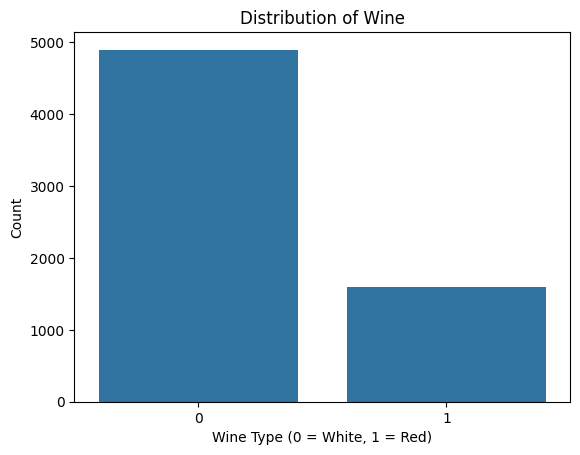

In [60]:
# Chosen Variables
target_feature = 'winetype'
explanatory_variables = ['residual sugar', 'citric acid', 'chlorides']

# Visualize the distribution of the target feature
sns.countplot(x='winetype', data=wine_data)
plt.title('Distribution of Wine')
plt.xlabel('Wine Type (0 = White, 1 = Red)')
plt.ylabel('Count')
plt.show()

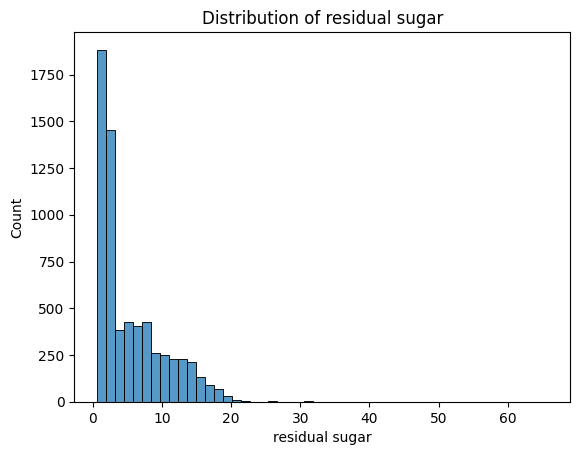

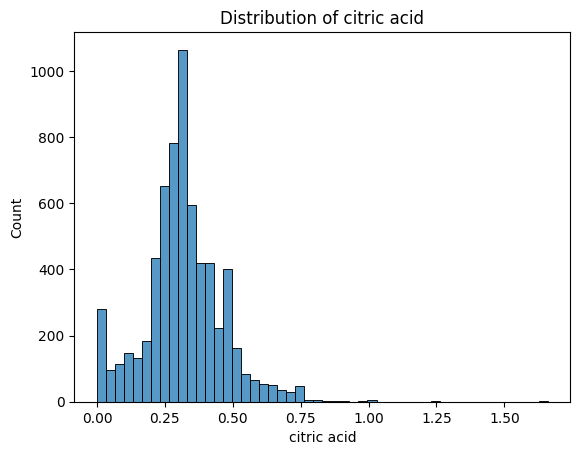

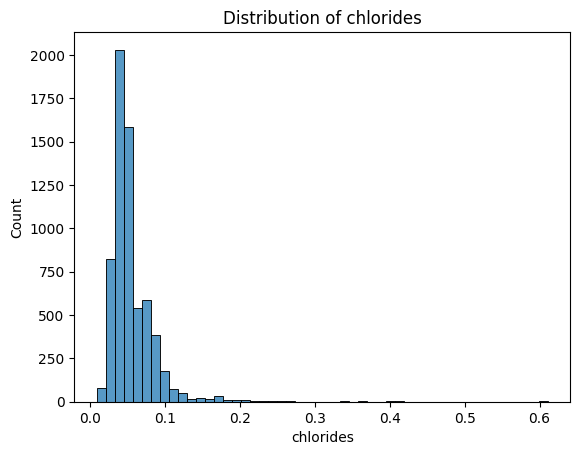

In [61]:
# Visualize each distribution of the specified explanatory variables
for var in explanatory_variables:
    sns.histplot(data=wine_data, x=var, bins=50)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

## 4. **Split Data and Build Models:**
   - Split the data into training and test sets.
   - Build models that evaluate the relationship between all available quantitative X variables in the dataset and the target variable "winetype".
   - Evaluate Logistic Regression, Penalized Logistic Regression, and KNN (for classification) using cross-validation. How different are the results?

In [77]:
# Split the data into target and explanatory variables
y = wine_data['winetype'] # target
X = (wine_data.copy()).drop(columns=['winetype']) # variables should not include the target

# Check data
print(y[0:5])
X.head()

0    0
1    0
2    0
3    0
4    0
Name: winetype, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [78]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


print(X.shape)
X_train.shape

(6497, 12)


(4872, 12)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# This time I want to build the models together

# LOGISTIC REGRESSION
# Set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
# Get mean accuracy score
log_cv_score = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print(f'Logistic Regression CV Accuracy: {log_cv_score.mean()} \n')

# PENALIZED LOGISTIC REGRESSION
# I choose l2 because I want to "keep all features but penalize large coefficients"
p_log = LogisticRegression(C=100, penalty='l2', max_iter=10000).fit(X_train, y_train)
# Get mean accuracy score
p_log_cv_score = cross_val_score(p_log, X_train, y_train, cv=10, scoring='accuracy')
print(f'Penalized Logistic Regression CV Accuracy: {p_log_cv_score.mean()} \n')

# KNN (for classification) 
# Use the default k = 5
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
# Get mean accuracy score
knn_cv_score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(f'KNN CV Accuracy: {knn_cv_score.mean()} \n')

Logistic Regression CV Accuracy: 0.9858375130440636 

Penalized Logistic Regression CV Accuracy: 0.9885056552327735 

KNN CV Accuracy: 0.9402724946982192 



* Q4 conclusion: KNN has the lowest score of 0.9403 whereas Logistic (0.9858) and Penalized Logistic(0.9885) have similar higher socres.

## 5. **Model Standardization:**
   - Try running your models from the previous question with and without `StandardScaler`. Does using `StandardScaler` help?

In [95]:
from sklearn.linear_model import LogisticRegressionCV

# Model Standardization
# Fit the models after creating pipelines with standardization
log_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000)).fit(X_train, y_train)
p_log_pipe = make_pipeline(StandardScaler(), LogisticRegressionCV(penalty='l2', cv=10, max_iter=10000)).fit(X_train, y_train) # cv=5 is actually sufficient since our data set is large
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier()).fit(X_train, y_train)

# Evaluate models with standardization
log_cv_score_scaled = cross_val_score(log_pipe, X_train, y_train, cv=10, scoring='accuracy')
p_log_cv_score_scaled = cross_val_score(p_log_pipe, X_train, y_train, cv=10, scoring='accuracy')
knn_cv_score_scaled = cross_val_score(knn_pipe, X_train, y_train, cv=10, scoring='accuracy')

print(f'Logistic Regression CV Accuracy: {log_cv_score_scaled.mean()} \n')
print(f'Penalized Logistic Regression CV Accuracy: {p_log_cv_score_scaled.mean()} \n')
print(f'KNN CV Accuracy: {knn_cv_score_scaled.mean()} \n')

Logistic Regression CV Accuracy: 0.9928152455650183 

Penalized Logistic Regression CV Accuracy: 0.9932259231830882 

KNN CV Accuracy: 0.9928152455650183 



In [109]:
# Same as my answer in below code
optimal_C = p_log_pipe.named_steps['logisticregressioncv'].C_[0]  # Access the LogisticRegressionCV step
print(f'Optimal C value chosen by LogisticRegressionCV: {optimal_C}')

Optimal C value chosen by LogisticRegressionCV: 21.54434690031882


Q5 conclusion: for Mean Accuracy score from cross-validation
* With standardization, Logistic Regression's scores have slightly improved from 0.9858 to 0.9928.
* With standardization, Penalized Logistic Regression's scores have slightly improved from 0.9885 to 0.9932.
* With standardization, KNN Regression's scores have improved significantly from 0.9402 to 0.9928, being equivalent to Logistic.

## 6. **Parameter Tuning:**
   - Tune the parameters of the models where possible using `GridSearchCV`. Do the results improve?

In [111]:
# Parameter Tuning using GridSearchCV
# I choose the do grid search only on scaled versions since: 
# 1. scaled versions have better accuracy.
# 2. Conducting grid search on the scaled model ensures that I am  evaluating the model performance under the same conditions that it will face during prediction. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Grid search for Logistic Regression
param_log = {'C': [0.1, 1.0, 10.0, 100.0]}  # test different parameter C for regularization strength
log_grid = GridSearchCV(LogisticRegression(max_iter=10000), param_log, cv=10, scoring='accuracy')
log_grid.fit(X_train_scaled, y_train)
# print best result
print('Best parameters for Logistic Regression:', log_grid.best_params_)
print(f'Best CV Accuracy for Logistic Regression: {log_grid.best_score_} \n')

# Grid search for Penalized Logistic Regression
param_p_log = {'C': [0.01, 0.1, 1, 20, 60, 80, 100]}  # test different parameter C for regularization strength
p_log_grid = GridSearchCV(LogisticRegression(penalty='l2', max_iter=10000), param_p_log, cv=10, scoring='accuracy')
p_log_grid.fit(X_train_scaled, y_train)
# print best result
print('Best parameters for Penalized Logistic Regression:', p_log_grid.best_params_)
print(f'Best CV Accuracy for Penalized Logistic Regression: {p_log_grid.best_score_} \n')


# Grid search for KNN
param_knn = {'n_neighbors': range(1, 20)} # test different parameter k
knn_grid = GridSearchCV(KNeighborsClassifier(), param_knn, cv=10, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
# print best result
print('Best parameters for KNN:', knn_grid.best_params_)
print(f'Best CV Accuracy for KNN: {knn_grid.best_score_} \n')

Best parameters for Logistic Regression: {'C': 10.0}
Best CV Accuracy for Logistic Regression: 0.9934312619921231 

Best parameters for Penalized Logistic Regression: {'C': 20}
Best CV Accuracy for Penalized Logistic Regression: 0.9934312619921231 

Best parameters for KNN: {'n_neighbors': 2}
Best CV Accuracy for KNN: 0.9946628740700845 



Q6 conclusion: for Mean Accuracy score after grid search <br>
In short, no big change
* Logistic Regression's scores have slightly improved from 0.9928 to 0.9934.
* Penalized Logistic Regression's scores have slightly improved from 0.9932 to 0.9934.
* KNN Regression's scores have improved from 0.9928 to 0.9947.



## 7. **Compare Model Coefficients:**
   - Compare the coefficients of Logistic Regression and Penalized Logistic Regression. Do they agree on which features are important?

In [116]:
# Select the best models found by grid search
# Logistic
log_best = log_grid.best_estimator_
log_best.fit(X_train_scaled, y_train)
# Penalized Logistic
p_log_best = p_log_grid.best_estimator_
p_log_best.fit(X_train_scaled, y_train)

# Create data frame for display
log_coeff = pd.DataFrame({'Feature': X.columns, 'Logistic Coefficient': log_best.coef_[0]})
p_log_coeff = pd.DataFrame({'Feature': X.columns, 'Penalized Logistic Coefficient': p_log_best.coef_[0]})

# Combine two data frame based on same feature
coeff_comparison = pd.merge(log_coeff, p_log_coeff, on='Feature')
display(coeff_comparison)

,Feature,Logistic Coefficient,Penalized Logistic Coefficient
0,fixed acidity,-0.212062,-0.277530
1,volatile acidity,1.191103,1.179922
2,citric acid,-0.448750,-0.462900
3,residual sugar,-5.212560,-5.423033
4,chlorides,0.773282,0.771874
5,free sulfur dioxide,1.343334,1.389335
6,total sulfur dioxide,-3.248259,-3.290747
7,density,5.230565,5.440626
8,pH,-0.142852,-0.198963
9,sulphates,0.486672,0.471091


Q7 Conclusion: 
* The absolute values of the coefficients for both models are relatively similar, so both models think the variables have similar levels of importance.
* Both models agree on the direction / sign of the relationships for all variables.
* Both models suggest that the some features (fixed acidity, pH) are relatively less important than the other variables since those features are close to zero.

## 8. **Discuss and Select the Final Model:**
   - Discuss which final model you would choose to predict new data.

Q8 Conclusion <br>
In short, I prefer penalized logistic regression model since:
* Performance: Both model have very similar CV accuracy, so this feature is less important
    - Logistic Regression: 0.9934
    - Penalized Logistic Regression: 0.9934
* Coefficient: Both model have very similar coefficients shown in Q7, so this feature is less important
* Regularization Effect: penalized logistic regression model use L2 regularization, so it has advantage in situations with multicollinearity. In addition, penalized logistic regression model has a lower parameter C value (c=80), compared to logistic regression model (c=100). A bigger C value has a higher risk of encountering problem like overfitting, reduced generalization, and lower accuracy on test data. Thus, penalized logistic regression model is a safer choice. 